# Run cells from AllenDB

In [ ]:
!git clone https://github.com/cyneuro/single-cell-tuning.git

In [3]:
%cd single-cell-tuning/Segregated/

[Errno 2] No such file or directory: 'single-cell-tuning/Segregated/'
/home/drfrbc/single-cell-tuning/manual tuning/Segregated PV


In [ ]:
# If running in Colab
!pip install --upgrade pip
!pip install --quiet allensdk neuron
!git clone -b release_candidate https://github.com/V-Marco/ACT.git

Cloning into 'ACT'...
remote: Enumerating objects: 4392, done.
remote: Counting objects: 100% (419/419), done.
remote: Compressing objects: 100% (298/298), done.
remote: Total 4392 (delta 200), reused 265 (delta 102), pack-reused 3973 (from 1)
Receiving objects: 100% (4392/4392), 153.20 MiB | 41.61 MiB/s, done.
Resolving deltas: 100% (2018/2018), done.


In [4]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 162.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 195.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 208.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 207.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 158.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 164.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 200.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 199.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 206.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 200.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 198.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from allensdk.model.biophys_sim.config import Config
from allensdk.model.biophysical.utils import Utils
import os
import json
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../../ACT")
from act.passive import ACTPassiveModule

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/torch/__init__.py:1236: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /pytorch/torch/csrc/tensor/python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [2]:
# Compile the modfiles
!nrnivmodl modfiles > /dev/null 2>&1

Get the cell. Only do this once so that you do not overwrite the fit file.

In [4]:
from allensdk.api.queries.biophysical_api import BiophysicalApi

In [ ]:
# bp = BiophysicalApi()

In [ ]:
specimen_id = 484635029
# query = bp.get_neuronal_models(specimen_id)
# print(query)

[{'id': 485602029, 'name': 'Biophysical - perisomatic_Pvalb-IRES-Cre;Ai14-201791.05.01.01', 'neuron_reconstruction_id': 496079599, 'neuronal_model_template_id': 329230710, 'specimen_id': 484635029}, {'id': 496538965, 'name': 'Biophysical - all active_Pvalb-IRES-Cre;Ai14-201791.05.01.01', 'neuron_reconstruction_id': 496079599, 'neuronal_model_template_id': 491455321, 'specimen_id': 484635029}]


In [ ]:
# choose perisomatic option
# print(query[0])
# id_to_use = query[0]['id']

{'id': 485602029, 'name': 'Biophysical - perisomatic_Pvalb-IRES-Cre;Ai14-201791.05.01.01', 'neuron_reconstruction_id': 496079599, 'neuronal_model_template_id': 329230710, 'specimen_id': 484635029}


In [ ]:
# bp.cache_stimulus = False # Change to False to not download the large stimulus NWB file
# bp.cache_data(id_to_use) # 'id'

2025-02-25 09:56:17,255 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496079601
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496079601
2025-02-25 09:56:17,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496605128
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496605128
2025-02-25 09:56:17,638 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
2025-02-25 09:56:17,798 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_fi

## Build the cell

**NOTE:** Control the soma area in the `build_cell` function below.

In [980]:


def build_cell():
    # Create the h object
    description = Config().load('manifest.json')
    utils = Utils(description)
    h = utils.h

    # Convert all "value" attributes to floats
    for dict in utils.description.data['genome']:
        for key, value in dict.items():
            if key == 'value': dict[key] = float(value)

    # assign e_pas if it is missing
    # utils.description.data['passive'][0]['e_pas'] = -71.25

    # Configure morphology
    morphology_path = description.manifest.get_path('MORPHOLOGY')
    utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))
    utils.load_cell_parameters()

    # To match PP
    h.soma[0].diam = h.soma[0].diam * 4

    return h

def set_simulation(stim_amp):
    h = build_cell()

    # record currents
    channels = ['Ca_HVA', 'Ca_LVA', 'Ih', 'Im_v2', 'K_T', 'Kd', 'Kv2like', 'Kv3_1', 'Nap', 'NaTa', 'SK']
    channel_currents = ['ica', 'ica', 'ihcn', 'ik', 'ik', 'ik', 'ik', 'ik', 'ina', 'ina', 'ik']
    if len(channels) != len(channel_currents):
        raise ValueError("channels and currents must be the same length")
    i_vec = {}
    for channel, current in zip(channels, channel_currents):
        i_vec[channel] = h.Vector()
        # i_vec[current].record(getattr(h.soma[0](0.5), f"{channel}.{current}"))
        i_vec[channel].record(getattr(h.soma[0](0.5), f"_ref_{current}_{channel}"))

    stim = h.IClamp(h.soma[0](0.5))
    stim.amp = stim_amp
    stim.delay = 300.0
    stim.dur = 1000
    h.tstop = 1500.0
    h.dt = 0.025#0.1
    h.steps_per_ms = 1 / h.dt

    return h, stim, i_vec

## Morphology

In [57]:
h = build_cell()

In [7]:
print(f"Soma area: {h.soma[0](0.5).area()}")
print(f"Soma diam: {h.soma[0].diam}")
print(f"Soma L: {h.soma[0].L}")

Soma area: 669.646002883916
Soma diam: 14.599800109863281
Soma L: 14.599853515625


## Passive properties

In [30]:
# get passive properties in ballpark using ACT

computed_soma_area = 6.69646002883916e-06 # 0.6x soma area: 4.017876e-06 # (cm2)

user_provided_Rin = 88.97 * 10e6 # (to Ohm from MOhm)
user_provided_tau = 5.9 * 1e-3 # (to s from ms)
user_provided_Vrest = -71.25 # (mV)

ACTPassiveModule.compute_spp(user_provided_Rin, computed_soma_area, user_provided_tau, user_provided_Vrest)

SettablePassiveProperties(Cm=0.990291702542554, g_bar_leak=0.00016784605127839899, e_rev_leak=-71.25, g_bar_h=None)

Update {specimen_id}_fit.json to use these SettablePassiveProperties, AND SET ACTIVE CONDUCTANCES TO ZERO. Leave Ih alone.

Then run GettablePassiveProperties, and manually adjust Cm, g_pas, and soma_area until GPP match desired.

Note: g_bar_leak = g_pas; e_rev_leak = e_pas

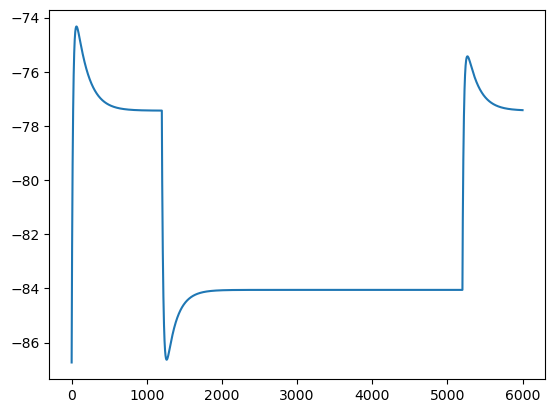

In [579]:
h = build_cell()
h, stim, i_vec = set_simulation(-0.1)
v = h.Vector().record(h.soma[0](0.5)._ref_v)
h.finitialize()
h.run()
plt.plot(v.as_numpy()[::10])

In [ ]:
print(ACTPassiveModule.compute_gpp(v.as_numpy(), h.dt, 300, 1290, -0.1))
print(f"V-rest: {v.as_numpy()[300]}")

# want tau1 = 5.9 +-2.9 ms
# want R_in = 88.97 +- 36.3 MOhm
# want V_rest = -71.25 +- 0.5 mV
# want Sag ratio = 0.96 +- .02
# want RMP = -71.25 +- 5.6 mV

# initial ( with 0.6 diam soma): 
# GettablePassiveProperties(R_in=464.3106664644827, tau1=22.900000000000002, tau2=38.5, sag_ratio=0.31502600618678417)
# V-rest: -82.51905011043115

# after setting all (except Ih) active conductances to 0, cm and e_pas to SPP.
# GettablePassiveProperties(R_in=607.6077730466968, tau1=14.200000000000001, tau2=23.900000000000002, sag_ratio=0.3646048279223687)
# V-rest: -74.75231402310501

# after setting all g_pas to SPP
# GettablePassiveProperties(R_in=182.56274252146767, tau1=5.1000000000000005, tau2=58.7, sag_ratio=0.07542396017985004)
# V-rest: -70.35936822768086

# after setting the soma area back to 1x but leaving SPP at 0.6x soma area
# GettablePassiveProperties(R_in=161.5889288473828, tau1=5.1000000000000005, tau2=54.5, sag_ratio=0.09118122219371612)
# V-rest: -69.91398897746699

# after setting the soma area back to 1x and setting SPP with 1x soma area
# GettablePassiveProperties(R_in=205.96972171197422, tau1=5.0, tau2=49.300000000000004, sag_ratio=0.142133718876533)
# V-rest: -69.52519773075788

# after setting the soma area back to 0.6x, leaving SPP as with 1x soma area # need to increase instead.
# GettablePassiveProperties(R_in=232.98080689919658, tau1=5.1000000000000005, tau2=53.5, sag_ratio=0.12330948616008622)
# V-rest: -70.08268590852717

# after setting the soma area to 2x with SPP at 1x soma area.
# GettablePassiveProperties(R_in=161.13135036092743, tau1=5.0, tau2=45.400000000000006, sag_ratio=0.15375329404246346)
# V-rest: -68.62337453052344
# changes: R_in decreased, tau1 decreased, tau2 decreased, sag_ratio increased, V-rest increased

# after setting the soma area to 4x with SPP at 1x soma area.
# GettablePassiveProperties(R_in=113.18692177355274, tau1=5.0, tau2=43.400000000000006, sag_ratio=0.1486982096774948)
# V-rest: -67.72270836291844
# changes: R_in decreased, tau1 unchanged, tau2 decreased, sag_ratio decreased, V-rest increased

# need V_rest to go to (-71.25 +- 5.6 mV with e_pas = ?) from (-67.72 with e_pas = -71.25)
# need sag_ratio to go to (0.96 +- .02) from (0.148)

# increase ih by 2x (from 0.00076944680932427212)
# GettablePassiveProperties(R_in=106.30494445752404, tau1=4.6000000000000005, tau2=36.6, sag_ratio=0.20755542907756935)
# V-rest: -65.7435621146836
# changes: R_in slightly decreased, tau1 decreased, tau2 decreased, sag_ratio increased, V-rest increased

# increase ih to 4x (from 0.00076944680932427212)
# GettablePassiveProperties(R_in=97.59297939838035, tau1=4.2, tau2=30.5, sag_ratio=0.2676793166376444)
# V-rest: -63.17403526031711
# changes: R_in slightly decreased, tau1 decreased, tau2 decreased, sag_ratio increased, V-rest increased

# increase ih to 8x (from 0.00076944680932427212)
# GettablePassiveProperties(R_in=87.59446810581167, tau1=3.7, tau2=25.5, sag_ratio=0.3202989624308018)
# V-rest: -59.92580094799387

# increase ih to 16x (from 0.00076944680932427212)
# GettablePassiveProperties(R_in=75.87793386378323, tau1=3.1, tau2=21.1, sag_ratio=0.48683236315719725)
# V-rest: -56.46631676949835
# discrepancies: R_in getting low, tau1 getting low, sag_ratio need to be higher, V-rest need to be lower

# decrease area to 2x (from 4x) with 16x ih
# GettablePassiveProperties(R_in=113.21463011149262, tau1=3.3000000000000003, tau2=21.700000000000003, sag_ratio=0.37300929262318283)
# V-rest: -58.26431414220387

# double g_pas (from 0.00016784605127839899)
# GettablePassiveProperties(R_in=72.7603109897413, tau1=2.1, tau2=27.0, sag_ratio=0.30460716748617594)
# V-rest: -61.915669981241095

# half g_pas (from 0.00016784605127839899)
# GettablePassiveProperties(R_in=158.1988908563831, tau1=4.3, tau2=17.2, sag_ratio=0.532293719549562)
# V-rest: -54.53665651706159

# increase cm
# double cm (from 0.990291702542554) with half g_pas (from 0.00016784605127839899), 2x soma area, and 16x ih
# GettablePassiveProperties(R_in=136.364677647326, tau1=7.1000000000000005, tau2=22.900000000000002, sag_ratio=0.457422328022519)
# V-rest: -53.70877010712911

# decrease cm
# halve cm (from 0.99029) with half g_pas (from 0.00016784605127839899), 2x soma area, and 16x ih
# GettablePassiveProperties(R_in=178.208930249247, tau1=2.6, tau2=13.8, sag_ratio=0.5848508056795511)
# V-rest: -55.15334000729351

# need to get V-rest closer to e_pas, decrease R_in, increase sag_ratio, tau1 is okay for now.

# increase g_pas
# 1x g_pas (from 0.00016784605127839899) with halve cm (from 0.99029) , 2x soma area, and 16x ih
# GettablePassiveProperties(R_in=120.33847247077802, tau1=1.9000000000000001, tau2=19.8, sag_ratio=0.4101248089920315)
# V-rest: -58.714301772611975
# decreased sag_ratio too much and didn't hlep enough so revert back to 0.5 g_pas.

# increase soma area to 4x with 0.5x g_pas (from 0.00016784605127839899), 0.5x cm (from 0.99029), and 16x ih
# GettablePassiveProperties(R_in=82.14415147321333, tau1=1.8, tau2=19.200000000000003, sag_ratio=0.5259795616055944)
# V-rest: -56.855939723469945
# should have decreased to 1x instead of increase to 4x.

# decrease soma area to 1x with 0.5x g_pas (from 0.00016784605127839899), 0.5x cm (from 0.99029), and 16x ih
# GettablePassiveProperties(R_in=234.6949324721585, tau1=2.8000000000000003, tau2=14.3, sag_ratio=0.4970140783750117)
# V-rest: -57.52829129951297

# sag matters less so revert Ih from 16x (0.01126944680932427212) to 2x (0.00146944680932427212) to get V-rest closer.
# GettablePassiveProperties(R_in=322.80163305737386, tau1=4.0, tau2=23.8, sag_ratio=0.36390203238542324)
# V-rest: -66.34519401870791

# increase soma area to 3x
# GettablePassiveProperties(R_in=207.95151357070736, tau1=3.9000000000000004, tau2=24.5, sag_ratio=0.3553857584169296)
# V-rest: -63.961324029958966

# increase g_pas to 0.0001 (from 0.00008784605127839899)
# GettablePassiveProperties(R_in=190.72784094133837, tau1=3.6, tau2=26.5, sag_ratio=0.33342108432366624)
# V-rest: -64.61178347458474

# increase soma area to 4x (from 3x)
# GettablePassiveProperties(R_in=162.73875021750257, tau1=3.6, tau2=27.1, sag_ratio=0.3229876932162329)
# V-rest: -64.04754623661229

# increase g_pas to 0.00015 (from 0.0001)
# GettablePassiveProperties(R_in=120.36434858251539, tau1=2.8000000000000003, tau2=32.800000000000004, sag_ratio=0.25384871632931616)
# V-rest: -65.76560663756476

# increase cm from 0.5 to 0.75
# GettablePassiveProperties(R_in=117.73235143170382, tau1=3.9000000000000004, tau2=34.1, sag_ratio=0.23716805378502562)
# V-rest: -65.55165738446806

# V-rest needs to be lower.
# R_in is okay, could be lower, tau1 is okay, could be higher.
# sag ratio could be 0.96 instead of 0.23;

# increase cm from 0.75 to 1.0
# GettablePassiveProperties(R_in=115.59128815607252, tau1=5.0, tau2=35.4, sag_ratio=0.22303837115939454)
# V-rest: -65.33108149200764

# decrease e_pas from -71.25 to -75
# GettablePassiveProperties(R_in=110.75035003167997, tau1=4.800000000000001, tau2=34.0, sag_ratio=0.27019039139579526)
# V-rest: -67.64173353768635

# decrease e_pas from -75 to -80
# GettablePassiveProperties(R_in=104.38374532625289, tau1=4.5, tau2=32.0, sag_ratio=0.3288905256008539)
# V-rest: -70.94784580265538

# want tau1 = 5.9 +-2.9 ms
# want R_in = 88.97 +- 36.3 MOhm
# want V_rest = -71.25 +- 0.5 mV
# want Sag ratio = 0.96 +- .02
# want RMP = -71.25 +- 5.6 mV

# seems close enough except sag_ratio.

# after getting some spikes:
# GettablePassiveProperties(R_in=83.66564104714314, tau1=3.6, tau2=32.7, sag_ratio=0.3606452874618122)
# V-rest: -75.75796109589862

# decreasing Ih from 0.00146944680932427212 to 0.001 because how its affecting spikes
# GettablePassiveProperties(R_in=88.23485656184687, tau1=3.9000000000000004, tau2=36.6, sag_ratio=0.32638226215831767)
# V-rest: -77.88609354010974
# v-rest is too low can fix later with e_pas since we set it to -80.

# set e_pas to 75.
# GettablePassiveProperties(R_in=92.01006018106455, tau1=3.9000000000000004, tau2=38.075, sag_ratio=0.2803167403180486)
# V-rest: -75.7250935908018

GettablePassiveProperties(R_in=92.01006018106455, tau1=3.9000000000000004, tau2=38.075, sag_ratio=0.2803167403180486)
V-rest: -75.7250935908018


Once GPP look fine, set Active channels conductances to Greg's: PV=FSI, SST=LTS

Then tune from there.

In [926]:
def count_voltage_events(t, v):
    """
    Counts the number of times the voltage goes above -20 mV and the slope changes from positive to negative.

    Args:
        t: A NumPy array of time points.
        v: A NumPy array of voltage values.

    Returns:
        The number of events.
    """

    # Calculate the slope of the voltage
    slope = np.diff(v)

    # Find the indices where the voltage is above -20 mV
    above_threshold_indices = np.where(v[:-1] > -20)[0]

    # Find the indices where the slope changes from positive to negative
    positive_to_negative_indices = np.where((slope[:-1] > 0) & (slope[1:] < 0))[0]

    # Find the intersection of the two sets of indices
    event_indices = np.intersect1d(above_threshold_indices, positive_to_negative_indices)

    return len(event_indices)

In [1027]:
# rebuild as needed
h = build_cell()

frequenies = []
amps = [-0.1, -0.05, 0, 0.05, 0.075, 0.1, 0.105, 0.11, 0.125, 0.15, 0.2, 0.25, 0.3]

bounds = (int(2990*(0.1/h.dt)), int(13010*(0.1/h.dt))) # adjust indices proportinate to dt = 0.1

for amp in amps:
    h, stim, i_vec = set_simulation(amp)
    v = h.Vector().record(h.soma[0](0.5)._ref_v)
    h.finitialize()
    h.run()
    frequenies.append(count_voltage_events(np.arange(len(v.as_numpy()))[bounds[0]:bounds[1]], v.as_numpy()[bounds[0]:bounds[1]]))
    currents = {key: np.array(i_vec[key]) for key in i_vec.keys()}

In [1028]:
for a, f in zip(amps, frequenies):
    print(f"{a}: {f}")

-0.1: 0
-0.05: 0
0: 0
0.05: 0
0.075: 0
0.1: 0
0.105: 1
0.11: 10
0.125: 20
0.15: 29
0.2: 36
0.25: 42
0.3: 47


Text(0, 0.5, 'Frequency (Hz)')

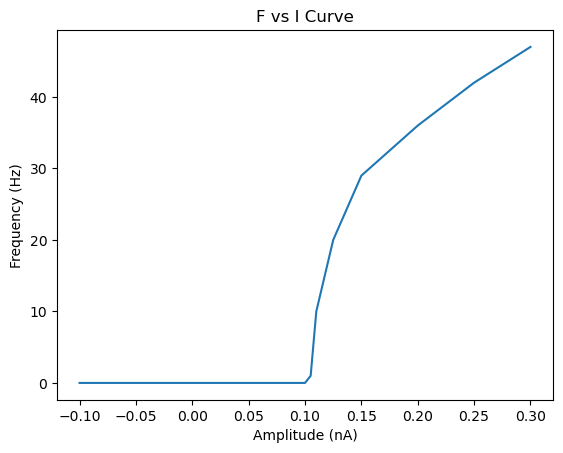

In [1029]:
# Change NaP to shift rheobase
# Change SK to change slope and rheobase
plt.plot(amps, frequenies)
plt.title("F vs I Curve")
plt.xlabel("Amplitude (nA)")
plt.ylabel("Frequency (Hz)")

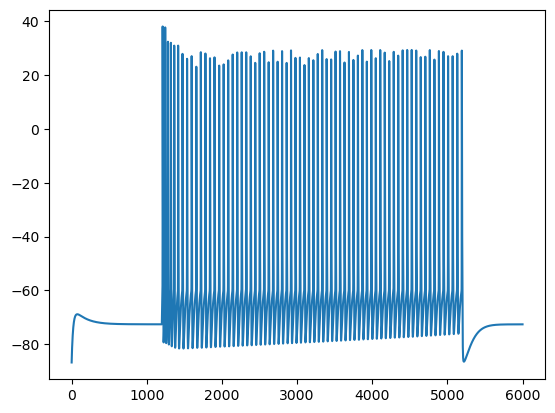

In [ ]:
# view last current injection's voltage trace
plt.plot(v.as_numpy()[::10])

In [1022]:
currents

{'Ca_HVA': array([-0.00000000e+000, -0.00000000e+000, -0.00000000e+000, ...,
        -1.21420010e-171, -1.16572230e-171, -1.11918002e-171]),
 'Ca_LVA': array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -5.04893417e-27, -5.01918008e-27, -4.98960135e-27]),
 'Ih': array([-0.00385714, -0.00385714, -0.0038453 , ..., -0.00067048,
        -0.00067047, -0.00067047]),
 'Im_v2': array([0., 0., 0., ..., 0., 0., 0.]),
 'K_T': array([0., 0., 0., ..., 0., 0., 0.]),
 'Kd': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.46585208e-89, 7.28151963e-89, 7.10173837e-89]),
 'Kv2like': array([0., 0., 0., ..., 0., 0., 0.]),
 'Kv3_1': array([0., 0., 0., ..., 0., 0., 0.]),
 'Nap': array([-0., -0., -0., ..., -0., -0., -0.]),
 'NaTa': array([-0., -0., -0., ..., -0., -0., -0.]),
 'SK': array([9.21932376e-06, 9.21932376e-06, 9.27754405e-06, ...,
        3.48948619e-05, 3.48860075e-05, 3.48771579e-05])}

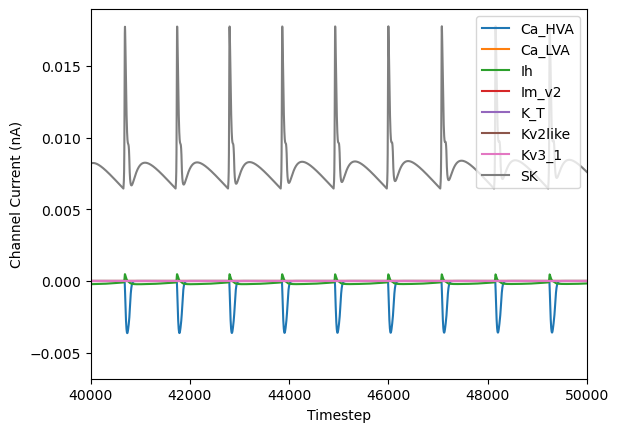

In [1004]:
dont_show = ['NaTa', 'Nap', 'Kd']

for current_name, current in currents.items():
    if current_name in dont_show:
        continue # skip this one
    plt.plot(current, label=f"{current_name}")
    plt.xlabel("Timestep")
    plt.ylabel("Channel Current (nA)")

# plt.ylim(-0.2, 0.2)
plt.xlim(40000,50000)
plt.legend()
plt.show()

(782.0, 787.0)

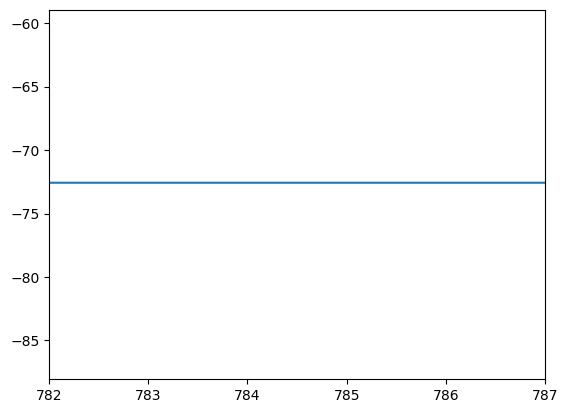

In [ ]:
# # with dt = 0.1 there are too few of time steps.
# plt.plot(v.as_numpy()[::10])
# plt.xlim(782,787)

(2000.0, 2100.0)

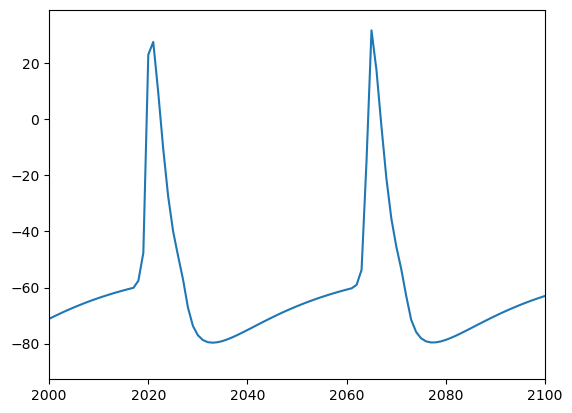

In [ ]:
# fixed with dt = 0.025
plt.plot(v.as_numpy()[::10])
plt.xlim(2000,2100)

In [569]:
# check passive properties with active conductances